# Проект: "Телекоммуникации"

**Оператор связи хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.**

### Описание услуг

***Оператор предоставляет два основных типа услуг:***

**1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.**

**2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).**

***Также доступны такие услуги:***

**1. Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);**

**2. Выделенная линия технической поддержки (TechSupport);**

**3. Облачное хранилище файлов для резервного копирования данных (OnlineBackup);**

**4. Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).**

**За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.**

### Описание данных

**contract_new.csv -  информация о договоре;**

**personal_new.csv - персональные данные клиента;**

**internet_new.csv - информация об интернет-услугах;**

**phone_new.csv - информация об услугах телефонии.**

**Во всех файлах столбец customerID содержит код клиента. Информация о договорах актуальна на 1 февраля 2020.**

### Цель проекта

**Остановить отток клиентов у оператор связи, путём обучения модели на признаках, тех клиентов что уже закрыли договор. Для того что бы она могла предсказать клиентов что находятся в "зоне риска" и предпринять действия, что бы предотвратить их уход, путём "акций" или "специальных предложений", или иными путями на усмотрение маркетологов.**

### План работы

**1. Загрузить и просмотреть общую информацию о данных**

**2. Предобработать данные, объеденение данных, а так же выделить признаки и целевой признак, так же необходимо провести оценку важности признаков, и удалить некоторые из них**

**3. Подготовить данные для обучение моделей разделив их на тестовые и валидационные**

**4. Подобрать и обучить модели и выбрать лучшую и выведя к ней матрицу ошибок**

## Загрузка и просмотр данных

### Импорт всех необходимых инструментов

In [1]:
import pandas as pd
!pip install phik
import phik
import os
import matplotlib.pyplot as plt
import seaborn as sns
!pip install shap
import shap
shap.initjs() 
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    train_test_split,
    cross_val_score
)
from sklearn.linear_model import (
    LogisticRegression
)
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix
)
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\piros\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\piros\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
data1_1 = 'contract_new.csv'
data1_2 = '/datasets/contract_new.csv'
data2_1 = 'personal_new.csv'
data2_2 = '/datasets/personal_new.csv'
data3_1 = 'internet_new.csv'
data3_2 = '/datasets/internet_new.csv'
data4_1 = '/datasets/phone_new.csv'
data4_2 = '/datasets/phone_new.csv'

if os.path.exists(data1_1):
    data_contract = pd.read_csv(data1_1, index_col=['customerID'])
elif os.path.exists(data1_2):
    data_contract = pd.read_csv(data1_2, index_col=['customerID'])
else:
    print('Something is wrong')
if os.path.exists(data2_1):
    data_personal = pd.read_csv(data2_1, index_col=['customerID'])
elif os.path.exists(data2_2):
    data_personal = pd.read_csv(data2_2, index_col=['customerID'])
else:
    print('Something is wrong')
if os.path.exists(data3_1):
    data_internet = pd.read_csv(data3_1, index_col=['customerID'])
elif os.path.exists(data3_2):
    data_internet = pd.read_csv(data3_2, index_col=['customerID'])
else:
    print('Something is wrong')
if os.path.exists(data4_1):
    data_phone = pd.read_csv(data4_1, index_col=['customerID'])
elif os.path.exists(data4_2):
    data_phone = pd.read_csv(data4_2, index_col=['customerID'])
else:
    print('Something is wrong')

### Просмотр информации о данных

In [3]:
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(6)
memory usage: 440.2+ KB


In [4]:
data_personal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB


In [5]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5517 non-null   object
 1   OnlineSecurity    5517 non-null   object
 2   OnlineBackup      5517 non-null   object
 3   DeviceProtection  5517 non-null   object
 4   TechSupport       5517 non-null   object
 5   StreamingTV       5517 non-null   object
 6   StreamingMovies   5517 non-null   object
dtypes: object(7)
memory usage: 344.8+ KB


In [6]:
data_phone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MultipleLines  6361 non-null   object
dtypes: object(1)
memory usage: 99.4+ KB


**Колличество данных в таблицах сильно разница, если в таблице с данным об интернет-услугах 5517 строк, то в данных о контрактах их 7043, радует, что колонка "customerID" объеденяет их всех и мы превратили её в индекс. Пропуски не наблюдаются, но тип данных в каждой колонке необходимо будет проверить на соотношение с теми данными что там хранятся**

### Откроем первые 10 строк каждой таблицы

In [7]:
data_contract.head(10)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96
1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21
6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48
7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68


In [8]:
data_personal.head(10)

,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No
9305-CDSKC,Female,0,No,No
1452-KIOVK,Male,0,No,Yes
6713-OKOMC,Female,0,No,No
7892-POOKP,Female,0,Yes,No


In [9]:
data_internet.head(10)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No
9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
6713-OKOMC,DSL,Yes,No,No,No,No,No
7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes


In [10]:
data_phone.head(10)

,MultipleLines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes
7892-POOKP,Yes
6388-TABGU,No
9763-GRSKD,No
7469-LKBCI,No


**Явно требуется изменить тип данных во многих колонках, но для уточнения на какой тип, необходимо более пристально просмотреть данные. EndDate в договорах выглдять как целевой признак.**

### Проверим на пропуски

In [11]:
data_contract.isna().sum()

BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [12]:
data_personal.isna().sum()

gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [13]:
data_internet.isna().sum()

InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [14]:
data_phone.isna().sum()

MultipleLines    0
dtype: int64

**Прекрасно пропусков нет**

### Для удобства соединим таблицы

**Сделаем это благодаря customerID, который является нашим индексом**

In [15]:
data = data_contract.merge(data_personal, how = 'outer', right_index = True, left_index = True).merge(
    data_internet, how = 'outer', right_index = True, left_index = True).merge(
    data_phone, how = 'outer', right_index = True, left_index = True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   int64  
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  InternetService   5517 non-null   object 
 12  OnlineSecurity    5517 non-null   object 
 13  OnlineBackup      5517 non-null   object 
 14  DeviceProtection  5517 non-null   object 
 15  TechSupport       5517 non-null   object 
 16  StreamingTV       5517 non-null 

### Описание данных

**customerID - уникальный идентификатор клиента**

**BeginDate - дата заключения договора**

**EndDate - дата окончания действия договора**

**Type - вид оплаты**

**PaperlessBilling - бумажный или электронный чек**

**PaymentMethod - способ оплаты**

**MonthlyCharges - ежемесячная плата за услуги**

**TotalCharges - сумма оплаты за все время**

**gender - пол**

**SeniorCitizen - наличие пенсионного статуса по возрасту**

**Partner - наличие супруга(и)**

**Dependents - наличие иждивенцев**

**InternetService - вид интернет связи**

**OnlineSecurity - онлайн безопасность**

**OnlineBackup - облачная резервная копия**

**DeviceProtection - защита устройства**

**TechSupport - техническая поддержка**

**StreamingTV - подключён ли кабельное**

**StreamingMovies - подключён ли стриминговый сервис**

**MultipleLines - наличие возможности ведения параллельных линий 
во время звонка**

### Изучим целевой признак и приведём к бинарному значению

**Посмотрим колличество уникальных значений**

In [17]:
len(data['EndDate'].unique())

67

In [18]:
data['EndDate'].value_counts()

No            5942
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
              ... 
2014-09-01       2
2014-12-01       2
2014-11-01       1
2014-06-01       1
2014-10-01       1
Name: EndDate, Length: 67, dtype: int64

**67 уникальных значений - это перебор. Сократим до двух в новой колонке target**

In [19]:
data['target'] = (data['EndDate']!= 'No').astype('int')

In [20]:
data['target'].value_counts()

0    5942
1    1101
Name: target, dtype: int64

**Наблюдаем дисбаланс у целевого признака**

### Заполнение пропусков

**В результате "сращивания" таблиц, образовались пропуски из-за разного колличества данных в таблицах, но это не беда, ведь пропуски касаюсься только данных связанных с интернетом, кабельным телевидением и тех. потдержкой**

In [21]:
data.isna().sum()

BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
target                 0
dtype: int64

**Так как простая замена всех пропусках в доп. услугах на No исказит данные, заменить на третий вариант NotUsed**

In [22]:
data = data.fillna('NotUsed')

In [23]:
data.isna().sum()

BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
target              0
dtype: int64

### Исправление типов данных

**В EndDate необходимо заполнить No, заполнить днём на какой момент эта информация актуальна, т.е. на 1 февраля 2020. Что бы можно было создать полезный признак с колличеством дней контракта, что бы можно было со спокойной душой удалять признаким BeginDate и EndDate. Но в процессе мы сталкиваемся с тем что некоторые из клиентов имеют отрицательное значения дней, т.к. заключили договор позднее актуальной даты, по этому для этих людей поставим дату актуальаности данных**

In [24]:
data.loc[data['EndDate'] == 'No','EndDate'] = '2020-01-01'
data.loc[data['BeginDate'] == '2020-02-01','BeginDate'] = '2020-01-01'

In [25]:
data['EndDate'] = pd.to_datetime(data['EndDate'], format = '%Y-%m-%d')
data['BeginDate'] = pd.to_datetime(data['BeginDate'], format = '%Y-%m-%d')

In [26]:
data['duration'] = (data['EndDate'] - data['BeginDate']).dt.days

In [27]:
#data['PaperlessBilling'] = data['PaperlessBilling'].astype('category')
#data['SeniorCitizen'] = data['SeniorCitizen'].astype('category')
#data['OnlineSecurity'] = data['OnlineSecurity'].astype('category')
#data['OnlineBackup'] = data['OnlineBackup'].astype('category')
#data['DeviceProtection'] = data['DeviceProtection'].astype('category')
#data['TechSupport'] = data['TechSupport'].astype('category')
#data['StreamingTV'] = data['StreamingTV'].astype('category')
#data['StreamingMovies'] = data['StreamingMovies'].astype('category')
#data['MultipleLines'] = data['MultipleLines'].astype('category')
#data['Partner'] = data['Partner'].astype('category')
#data['Dependents'] = data['Dependents'].astype('category')
#data['Type'] = data['Type'].astype('category')
#data['gender'] = data['gender'].astype('category')
#data['PaymentMethod'] = data['PaymentMethod'].astype('category')
#data['InternetService'] = data['InternetService'].astype('category')

**В процессе в колонке TotalCharges были обнаружены пропуски, у тех людей кто был зарегестрирован ПОСЛЕ даты, которую нам выдали в качестве актуальной, так как это совсем новые клиенты, думаю в TotalCharges можно вписать 0**

In [28]:
data[data['TotalCharges'] == ' ']

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,target,duration
customerID,,,,,,,,,,,,,,,,,,,,,
1371-DWPAZ,2020-01-01,2020-01-01,Two year,No,Credit card (automatic),56.05,,Female,0,Yes,...,DSL,Yes,Yes,Yes,Yes,Yes,No,NotUsed,0,0
2520-SGTTA,2020-01-01,2020-01-01,Two year,No,Mailed check,20.00,,Female,0,Yes,...,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,No,0,0
2775-SEFEE,2020-01-01,2020-01-01,Two year,Yes,Bank transfer (automatic),61.90,,Male,0,No,...,DSL,Yes,Yes,No,Yes,No,No,Yes,0,0
2923-ARZLG,2020-01-01,2020-01-01,One year,Yes,Mailed check,19.70,,Male,0,Yes,...,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,No,0,0
3115-CZMZD,2020-01-01,2020-01-01,Two year,No,Mailed check,20.25,,Male,0,No,...,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,No,0,0
3213-VVOLG,2020-01-01,2020-01-01,Two year,No,Mailed check,25.35,,Male,0,Yes,...,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,Yes,0,0
4075-WKNIU,2020-01-01,2020-01-01,Two year,No,Mailed check,73.35,,Female,0,Yes,...,DSL,No,Yes,Yes,Yes,Yes,No,Yes,0,0
4367-NUYAO,2020-01-01,2020-01-01,Two year,No,Mailed check,25.75,,Male,0,Yes,...,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,Yes,0,0
4472-LVYGI,2020-01-01,2020-01-01,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,Yes,...,DSL,Yes,No,Yes,Yes,Yes,No,NotUsed,0,0


In [29]:
data.loc[data['TotalCharges'] == ' ', 'TotalCharges'] = 0

In [30]:
data['TotalCharges'] = data['TotalCharges'].astype('float64')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   gender            7043 non-null   object        
 8   SeniorCitizen     7043 non-null   int64         
 9   Partner           7043 non-null   object        
 10  Dependents        7043 non-null   object        
 11  InternetService   7043 non-null   object        
 12  OnlineSecurity    7043 non-null   object        
 13  OnlineBackup      7043 non-null   object        
 14  DeviceProtecti

**Вроде привели в порядок, для данного этапа**

### Просмотрим на графики

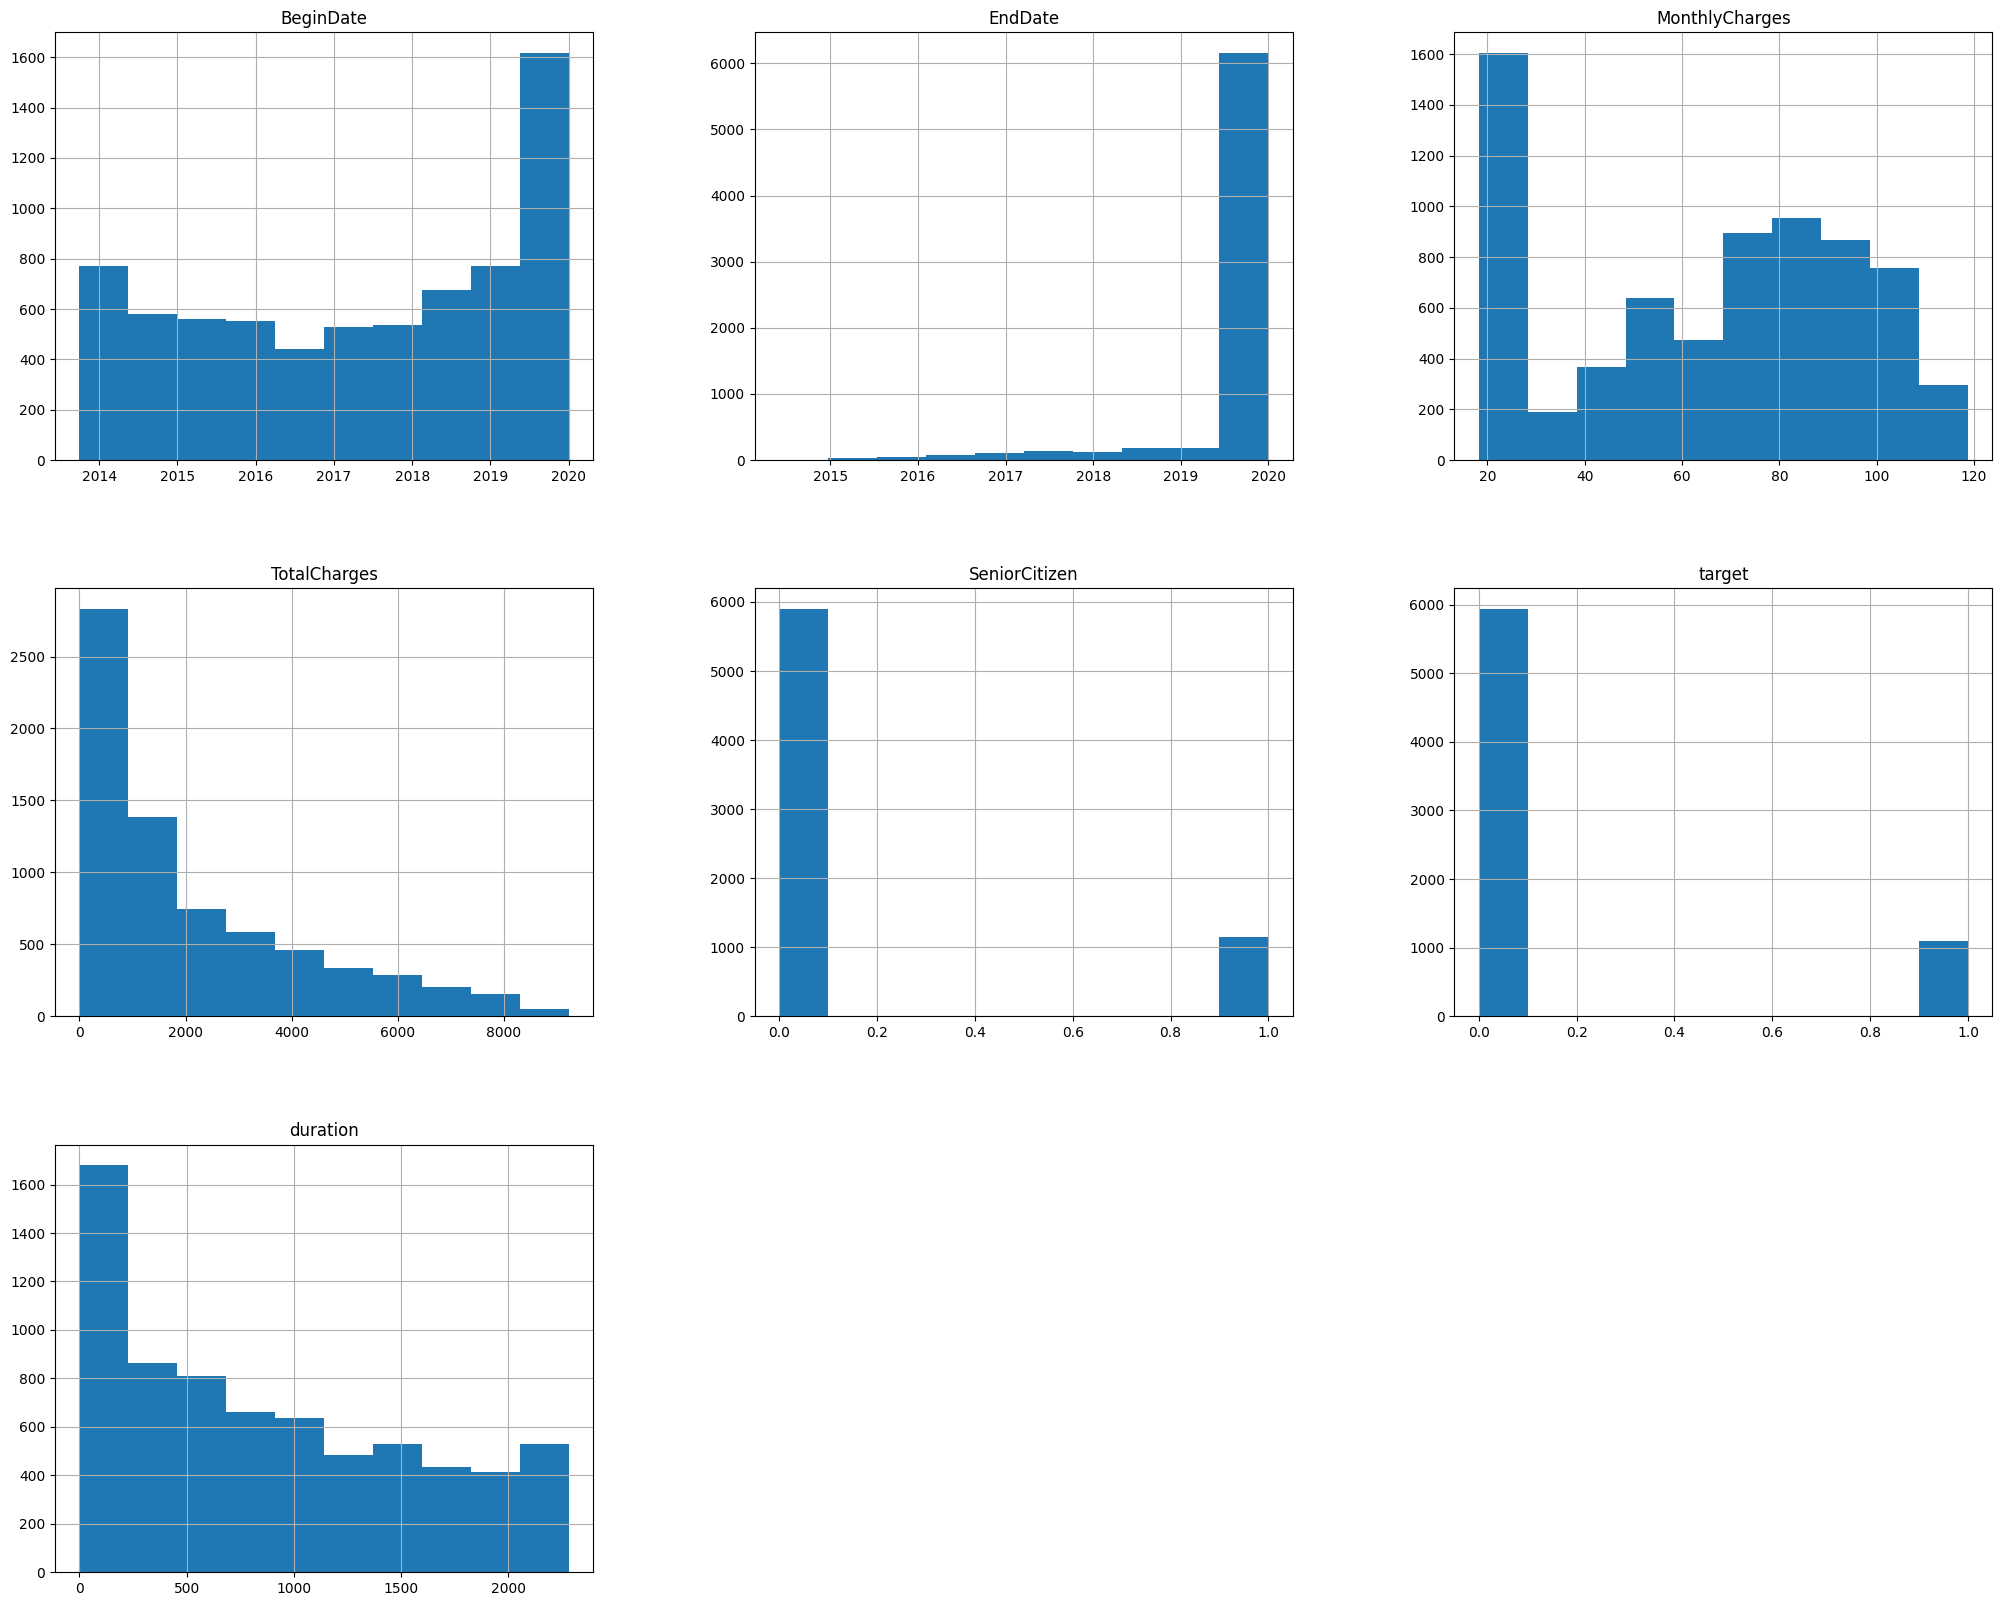

In [32]:
data.hist(figsize=(25, 20))
plt.show()

**Ух, в 2020 году просто огромное колличество отказавшихся клиентов, даже как то анамально, возможно это компенсация того бума новыех подключей что происходит параллельно. Большинство людей платят по минимальному тарифу, дальше идёт нормальное распределение с небольшим вторым пиком. Большая часть людей не прибугают к дополнительным услугам, хотя услуги мультилиний и стиминга пользуются всё большей популярностью, большинство предпочитает бумажные чеки и женатых и неженатых примерно одинаковое колличество.**

## Вывод

**1. Данные были загружены и проверены на пропуски и дубликаты**

**2. По колонке customerID данные были объеденены, а образовавшиеся пропуски заполнены**

**3. Был выделин целевой признак в отдельную колонку**

**4. Был добавлен новый признак - это колличество дней с момента заключение договора**

**5. Многие признаки были приведены к бинарному значению для удобства анализа и обучения**

**6. Типы данных в колонках были исправлены**

**7. Был проведён анализ данных, и выявленно, что в 2020 году сильный отток клиентов, ситуацию необходимо исправлять**

## Подготовка данных к исследованию

### Удаление колонок

**Помимо колонок с датой, удалим ещё пол, пенсионный признак, наличием детей и нужны ли клиентам бумажные чеки**

In [33]:
data = data.drop(['BeginDate', 'EndDate', 'gender', 'SeniorCitizen', 'Dependents', 'PaperlessBilling', 'MonthlyCharges'], axis = 1)

In [34]:
#data.reset_index(drop=True , inplace=True)

### Разделим данные на обучающую и тестовую выборку

In [35]:
features = data.drop(['target'], axis=1)
target = data['target']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=3072023
)

In [36]:
features_train.shape, features_test.shape

((5282, 13), (1761, 13))

### Закодируем признаки и отскалируем

**Выделим числовые признаки**

In [37]:
numeric = features_train.select_dtypes(exclude='object').columns.to_list()
numeric

['TotalCharges', 'duration']

**Выделим категориальные признаки**

In [38]:
category = features_train.select_dtypes(include='object').columns.to_list()
category

['Type',
 'PaymentMethod',
 'Partner',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'MultipleLines']

In [39]:
features_train_ridge = features_train.copy()
features_test_ridge = features_test.copy()

**Подготовим данные для деревянных моделей**

In [40]:
category_rf = category.copy()
category_rf.remove('Type')
category_rf.remove('InternetService')
category_rf.remove('MultipleLines')
category_rf

['PaymentMethod',
 'Partner',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [41]:
category_pri = ['Type', 'InternetService', 'MultipleLines']

In [42]:
cod_features_train = features_train_ridge.copy()
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
cat_features = cod_features_train[category_pri]
cat_features = pd.DataFrame(encoder.fit_transform(cat_features),
                                columns=cat_features.columns, 
                                index=cat_features.index)
for column in category_pri:
    cod_features_train[column] = cat_features[column].astype('int')

In [43]:
cod_features_test = features_test_ridge.copy()
cat_features = cod_features_test[category_pri]
cat_features = pd.DataFrame(encoder.transform(cat_features),
                                columns=cat_features.columns, 
                                index=cat_features.index)
for column in category_pri:
    cod_features_test[column] = cat_features[column].astype('int')

In [44]:
cod_encoder_ohe = OneHotEncoder(drop='first', sparse=False)
cod_encoder_ohe.fit(features_train_ridge[category_rf])
cod_features_train[cod_encoder_ohe.get_feature_names_out()] = cod_encoder_ohe.transform(features_train_ridge[category_rf])
cod_features_train = cod_features_train.drop(category_rf, axis=1)
scaler = StandardScaler()
cod_features_train[numeric] = scaler.fit_transform(cod_features_train[numeric])
cod_features_train.sample(10)

,Type,TotalCharges,InternetService,MultipleLines,duration,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,OnlineSecurity_NotUsed,...,OnlineBackup_NotUsed,OnlineBackup_Yes,DeviceProtection_NotUsed,DeviceProtection_Yes,TechSupport_NotUsed,TechSupport_Yes,StreamingTV_NotUsed,StreamingTV_Yes,StreamingMovies_NotUsed,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
3884-UEBXB,2,0.227588,0,1,1.658797,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6848-HJTXY,2,-0.374587,2,0,1.524531,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3372-KWFBM,0,-0.794226,1,2,-1.051336,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3426-NIYYL,0,-0.608759,0,2,-0.607674,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7841-FCRQD,1,-0.159554,0,0,0.148303,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4654-ULTTN,2,1.628090,0,2,1.791604,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
6704-UTUKK,0,-0.369091,0,1,-0.031205,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4701-LKOZD,2,2.123453,0,2,1.791604,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
8999-YPYBV,2,0.797603,0,0,0.680989,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [45]:
cod_features_test[cod_encoder_ohe.get_feature_names_out()] = cod_encoder_ohe.transform(features_test_ridge[category_rf])
cod_features_test = cod_features_test.drop(category_rf, axis=1)
cod_features_test[numeric] = scaler.transform(cod_features_test[numeric])
cod_features_test.sample(10)

,Type,TotalCharges,InternetService,MultipleLines,duration,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,OnlineSecurity_NotUsed,...,OnlineBackup_NotUsed,OnlineBackup_Yes,DeviceProtection_NotUsed,DeviceProtection_Yes,TechSupport_NotUsed,TechSupport_Yes,StreamingTV_NotUsed,StreamingTV_Yes,StreamingMovies_NotUsed,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7471-WNSUF,1,-0.823144,2,2,-0.654375,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7926-IJOOU,0,-0.990059,2,0,-1.274627,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1658-TJVOA,0,-0.788735,1,0,-1.051336,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4942-VZZOM,1,1.004868,0,2,1.524531,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7402-EYFXX,0,0.152800,1,2,-0.164012,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7716-YTYHG,1,0.437888,1,2,0.370134,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9385-NXKDA,2,2.043094,0,2,1.877709,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
0115-TFERT,0,0.264137,1,2,-0.254496,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
5622-UEJFI,2,-0.553119,2,2,0.237327,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [46]:
cod_features_train.shape, cod_features_test.shape

((5282, 21), (1761, 21))

**Используем OHE для кодирования категориальных признаков и после скалируем их на основе количественных признаков**

**Чтобы не попасть в дамми-ловушку, был применён аргумент drop_first**

In [47]:
encoder_ohe = OneHotEncoder(drop='first', sparse=False)
encoder_ohe.fit(features_train_ridge[category])
features_train_ridge[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train_ridge[category])
features_train_ridge = features_train_ridge.drop(category, axis=1)
scaler = StandardScaler()
features_train_ridge[numeric] = scaler.fit_transform(features_train_ridge[numeric])
features_train_ridge.sample(10)

,TotalCharges,duration,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,InternetService_Fiber optic,InternetService_NotUsed,...,DeviceProtection_NotUsed,DeviceProtection_Yes,TechSupport_NotUsed,TechSupport_Yes,StreamingTV_NotUsed,StreamingTV_Yes,StreamingMovies_NotUsed,StreamingMovies_Yes,MultipleLines_NotUsed,MultipleLines_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
2466-NEJOJ,-0.921804,-0.962312,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5066-GFJMM,-0.968109,-1.185602,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7975-TZMLR,1.478126,0.770013,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5216-WASFJ,0.258386,0.059278,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3001-CBHLQ,-0.452973,-0.782804,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1699-UOTXU,0.744703,1.345023,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397-XKKWR,-0.875205,-1.006094,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6195-MELTI,0.475379,1.215135,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1513-XNPPH,-0.383027,-0.696698,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


**Повторяем процедуру с тестовой выборкой**

In [48]:
features_test_ridge[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_test_ridge[category])
features_test_ridge = features_test_ridge.drop(category, axis=1)
features_test_ridge[numeric] = scaler.transform(features_test_ridge[numeric])

features_test_ridge.sample(10)

,TotalCharges,duration,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,InternetService_Fiber optic,InternetService_NotUsed,...,DeviceProtection_NotUsed,DeviceProtection_Yes,TechSupport_NotUsed,TechSupport_Yes,StreamingTV_NotUsed,StreamingTV_Yes,StreamingMovies_NotUsed,StreamingMovies_Yes,MultipleLines_NotUsed,MultipleLines_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7402-EYFXX,0.152800,-0.164012,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
8544-GOQSH,-0.468689,-0.696698,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3887-PBQAO,-0.803031,-0.562432,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
0625-AFOHS,-0.721895,-0.031205,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6088-BXMRG,0.617963,0.103061,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7879-CGSFV,1.837935,1.126111,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4129-LYCOI,2.299254,1.658797,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
9840-DVNDC,-0.580025,-0.873288,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1548-FEHVL,2.159396,1.390265,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [49]:
features_train_ridge.shape, features_test_ridge.shape

((5282, 24), (1761, 24))

**Проверим есть ли различия в названиях колонок**

In [50]:
(features_train_ridge.columns != features_test_ridge.columns).sum()

0

### Анализ признаков

In [51]:
corr = features_train_ridge.phik_matrix(interval_cols=numeric)

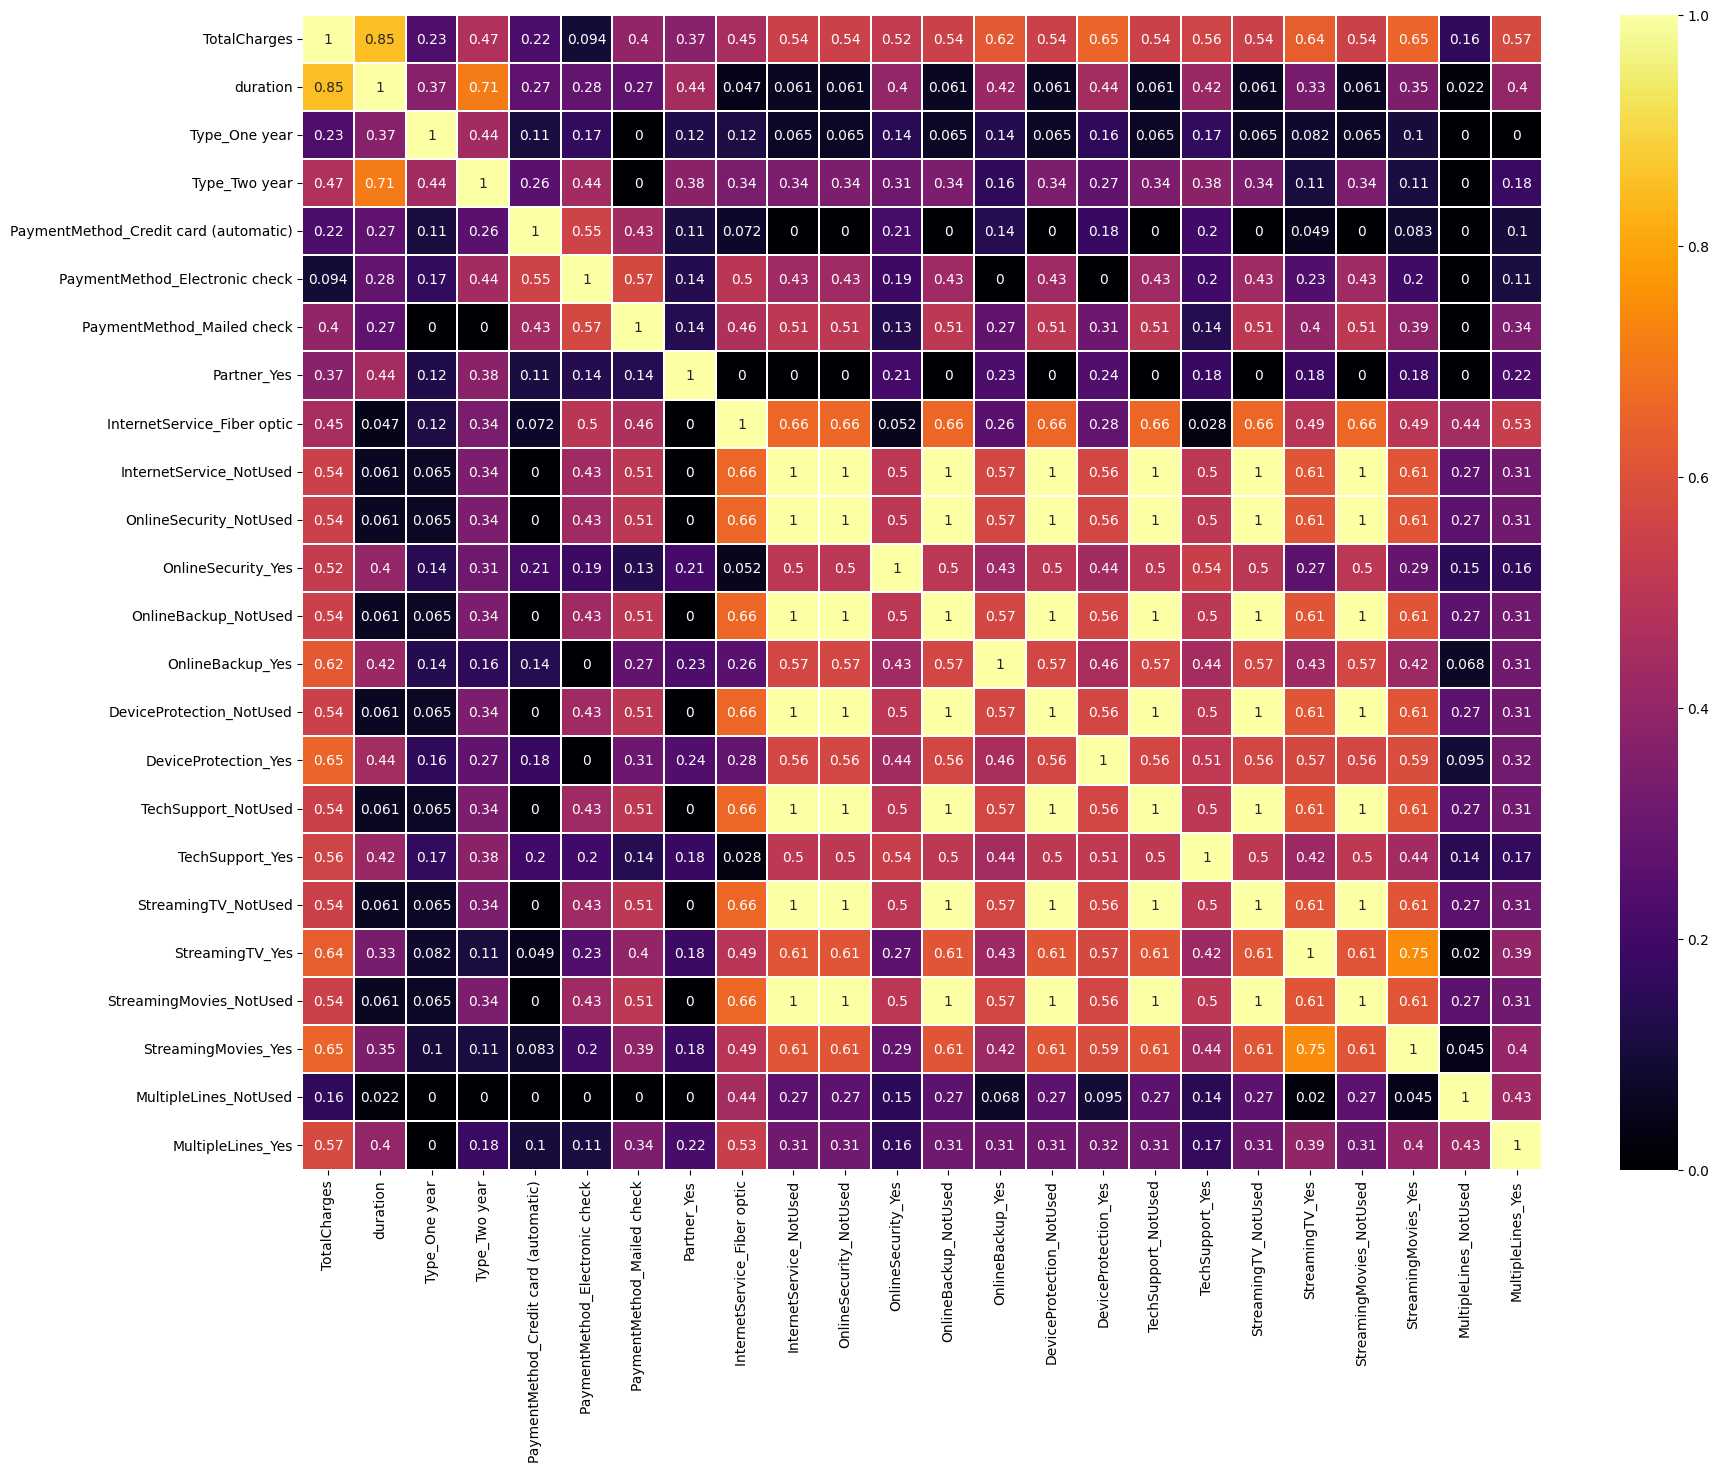

In [52]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr, yticklabels=corr.columns, annot=True, cmap="inferno", linewidths=0.2, ax=ax)
plt.show()

**Наблюдаем мощнейшую корреляцию признрака TotalCharges и duration, что впринципе логично, ну и так же сильное влияние TotalCharges оказывает на доп услуги**

**Как мы видим все колонки NotUsed максимально сильно коррелируются с наличием подключения интернета (что совершенно логичено), удалим их**

In [53]:
features_train_ridge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 7567-ECMCM to 8216-AZUUZ
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   TotalCharges                           5282 non-null   float64
 1   duration                               5282 non-null   float64
 2   Type_One year                          5282 non-null   float64
 3   Type_Two year                          5282 non-null   float64
 4   PaymentMethod_Credit card (automatic)  5282 non-null   float64
 5   PaymentMethod_Electronic check         5282 non-null   float64
 6   PaymentMethod_Mailed check             5282 non-null   float64
 7   Partner_Yes                            5282 non-null   float64
 8   InternetService_Fiber optic            5282 non-null   float64
 9   InternetService_NotUsed                5282 non-null   float64
 10  OnlineSecurity_NotUsed                 5282 non-null   float64

In [54]:
features_train_ridge = features_train_ridge.drop(['OnlineSecurity_NotUsed', 'OnlineBackup_NotUsed',
                                                  'DeviceProtection_NotUsed', 'TechSupport_NotUsed',
                                                  'StreamingTV_NotUsed', 'StreamingMovies_NotUsed'
                                                  ], axis = 1)
features_test_ridge = features_test_ridge.drop(['OnlineSecurity_NotUsed', 'OnlineBackup_NotUsed',
                                                  'DeviceProtection_NotUsed', 'TechSupport_NotUsed',
                                                  'StreamingTV_NotUsed', 'StreamingMovies_NotUsed'], axis = 1)

In [55]:
features_train_ridge = features_train_ridge.drop(['TotalCharges'], axis = 1)
features_test_ridge = features_test_ridge.drop(['TotalCharges'], axis = 1)

In [56]:
cod_features_train = cod_features_train.drop(['TotalCharges', 'OnlineSecurity_NotUsed', 'OnlineBackup_NotUsed',
                                                  'DeviceProtection_NotUsed', 'TechSupport_NotUsed',
                                                  'StreamingTV_NotUsed', 'StreamingMovies_NotUsed'], axis = 1)
cod_features_test = cod_features_test.drop(['TotalCharges', 'OnlineSecurity_NotUsed', 'OnlineBackup_NotUsed',
                                                  'DeviceProtection_NotUsed', 'TechSupport_NotUsed',
                                                  'StreamingTV_NotUsed', 'StreamingMovies_NotUsed'], axis = 1)

## Исследование задачи

### Решающее древо

In [57]:
def get_cv_scores(model, target, features):   
    scores = cross_val_score(model,
                             features,
                             target,
                             cv=5,
                             scoring='roc_auc')
    
    return scores.mean()

In [58]:
result = 0
depth = 0
for depth in range(1, 20):
    model_tree = DecisionTreeClassifier(random_state=3072023, max_depth=depth, splitter='best', criterion='entropy')
    gcs = get_cv_scores(model_tree, target_train, cod_features_train)
    if gcs > result:
        result = gcs
        depth = depth
print(result)
print(depth)

0.7966961773674713
19


In [59]:
model_tree = DecisionTreeClassifier(random_state=3072023, max_depth=19, splitter='best', criterion='entropy')

**Древо решений показало не самый лучший результат, пойдём дальше**

### Модель логической регресии

In [60]:
model_log = LogisticRegression(random_state=3072023, solver = 'liblinear')
print(get_cv_scores(model_log, target_train, features_train_ridge))

0.7420310656719487


**Чуда тут я и не ждал**

### Случайный лес

In [61]:
model_forest = RandomForestClassifier(random_state=3072023, n_estimators=600, max_depth=19)
print(get_cv_scores(model_forest, target_train, cod_features_train))

0.785832981645872


**Не будем отчаиваться и пойдём дальше**

### Кошачья модель

In [62]:
best_result = 0
best_depth = 0
best_iterations = 0
for depth in range(1, 4, 1):
    for iterations_i in range(200, 500, 100):
        model_cat = CatBoostClassifier(
                                      random_state=3072023,
                                      iterations=iterations_i,
                                      depth = depth 
                                      )
        gcs = get_cv_scores(model_cat, target_train, cod_features_train)
        if best_result < gcs:
            best_result = gcs
            best_depth = depth
            best_iterations = iterations_i
print(best_result)
print(best_depth)
print(best_iterations)

Learning rate set to 0.083391
0:	learn: 0.6438530	total: 140ms	remaining: 27.8s
1:	learn: 0.6011592	total: 141ms	remaining: 14s
2:	learn: 0.5701841	total: 143ms	remaining: 9.4s
3:	learn: 0.5410693	total: 145ms	remaining: 7.11s
4:	learn: 0.5167734	total: 147ms	remaining: 5.73s
5:	learn: 0.4980900	total: 149ms	remaining: 4.82s
6:	learn: 0.4815447	total: 151ms	remaining: 4.16s
7:	learn: 0.4682779	total: 153ms	remaining: 3.67s
8:	learn: 0.4579627	total: 155ms	remaining: 3.28s
9:	learn: 0.4505616	total: 156ms	remaining: 2.97s
10:	learn: 0.4431718	total: 158ms	remaining: 2.72s
11:	learn: 0.4360042	total: 160ms	remaining: 2.51s
12:	learn: 0.4301555	total: 162ms	remaining: 2.33s
13:	learn: 0.4224428	total: 164ms	remaining: 2.17s
14:	learn: 0.4180718	total: 165ms	remaining: 2.04s
15:	learn: 0.4144042	total: 167ms	remaining: 1.92s
16:	learn: 0.4115831	total: 169ms	remaining: 1.82s
17:	learn: 0.4069920	total: 171ms	remaining: 1.73s
18:	learn: 0.4045032	total: 173ms	remaining: 1.65s
19:	learn: 0.4

**Ура 0.85! Хоть и по нижней границе, но вроде должно подходить**

**Выделим лучшую модель и введём лучшие параметры дня неё**

In [63]:
model_best = CatBoostClassifier(random_state=3072023,
                               iterations=400,
                               depth = 3)
model_best = model_best.fit(cod_features_train, target_train)

Learning rate set to 0.048583
0:	learn: 0.6569000	total: 1.47ms	remaining: 585ms
1:	learn: 0.6219265	total: 2.92ms	remaining: 582ms
2:	learn: 0.5919094	total: 4.3ms	remaining: 569ms
3:	learn: 0.5686628	total: 5.62ms	remaining: 556ms
4:	learn: 0.5435394	total: 7.49ms	remaining: 591ms
5:	learn: 0.5264549	total: 9.01ms	remaining: 591ms
6:	learn: 0.5099249	total: 10.6ms	remaining: 595ms
7:	learn: 0.4936351	total: 12.1ms	remaining: 594ms
8:	learn: 0.4827667	total: 13.4ms	remaining: 582ms
9:	learn: 0.4700837	total: 14.9ms	remaining: 583ms
10:	learn: 0.4592000	total: 16.6ms	remaining: 585ms
11:	learn: 0.4486964	total: 18ms	remaining: 583ms
12:	learn: 0.4380252	total: 19.6ms	remaining: 583ms
13:	learn: 0.4312504	total: 20.9ms	remaining: 577ms
14:	learn: 0.4224018	total: 22.6ms	remaining: 579ms
15:	learn: 0.4160092	total: 24.2ms	remaining: 580ms
16:	learn: 0.4107280	total: 25.7ms	remaining: 578ms
17:	learn: 0.4048915	total: 27.3ms	remaining: 579ms
18:	learn: 0.3987245	total: 28.9ms	remaining: 5

## Тестирование модели

### Точность

In [64]:
test_predictions = model_best.predict(cod_features_test)
accuracy = accuracy_score(target_test, test_predictions)
print('Точность модели на тестовой выборке',accuracy)

Точность модели на тестовой выборке 0.8875638841567292


### ROC-AUC

In [65]:
test_predictions = (model_best.predict_proba(cod_features_test))[:, 1]
print("roc_auc:", roc_auc_score(target_test, test_predictions))

roc_auc: 0.8825162972620599


### ROC-кривая

**Для модели, которая всегда отвечает случайно, ROC-кривая выглядит как прямая, идущая из левого нижнего угла в верхний правый. Чем график выше, тем больше значение TPR и лучше качество модели. Посмотрим какая модель получилась у нас.**

<Figure size 640x480 with 0 Axes>

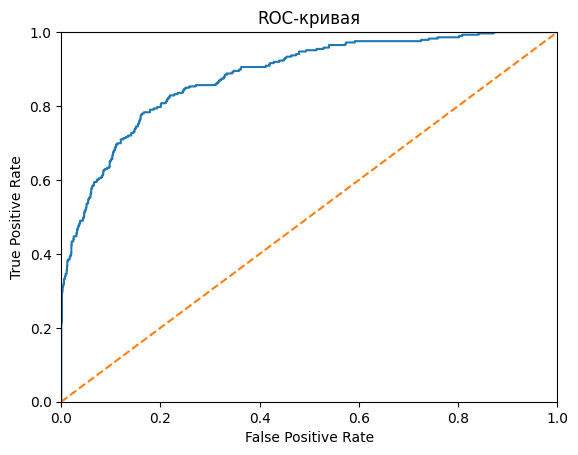

0.8825162972620599


In [66]:
test = (model_best.predict_proba(cod_features_test))[:, 1]

auc_roc = roc_auc_score(target_test, test)
fpr, tpr, thresholds = roc_curve(target_test, test)
plt.figure()
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
print(auc_roc)

**ROC-кривая показывает что у модели высокое качество.**

### Матрица ошибок

In [67]:
confusion_matrix(target_test, model_best.predict(cod_features_test))

array([[1453,   22],
       [ 176,  110]], dtype=int64)

**TN (верхний левый угол) указывает на то, что отток клиентов должен замедлиться ведь модель предсказывает, что истинно негативных ответов намного больше чем остальных**

**FP (верхний правый угол) указывает на то, что ошибочных предсказаний ухода будет немного** 

**FN (нижний левый угол) показывает, что ложный предсказаний того что клиент не уйдёт**

**TP (нижний правый угол) истинных предсказаний того что клиент останется намного больше чем ошибочных предсказаний ухода**

### Оценка признаков

In [68]:
explainer = shap.TreeExplainer(model_best)
shap_values = explainer.shap_values(cod_features_test)

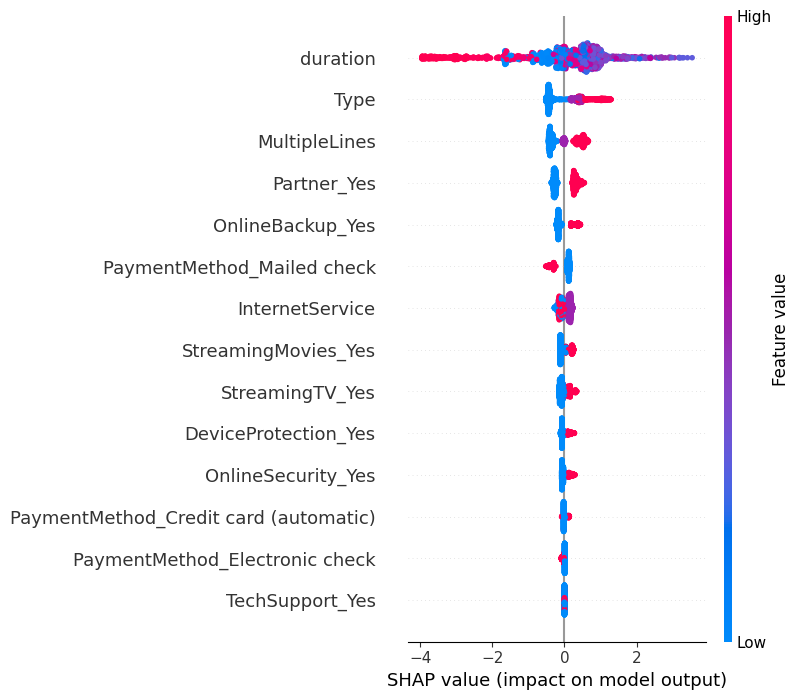

In [69]:
shap.summary_plot(shap_values, cod_features_test, max_display=cod_features_test.shape[1])

**Как мы видим самыми сильновлиящюми признаком оказался созданный признак - это колличества дней проведённым клиентом в компании, вторым идём вид оплаты, третим же подключение услуги мультилинии**

In [70]:
tab = pd.DataFrame({"Наименование модели": ["DecisionTreeClassifier", "LogisticRegression", "RandomForestClassifier", "CatBoostClassifier"],
                   "ROC-AUC": [get_cv_scores(model_tree, target_train, cod_features_train),
                               get_cv_scores(model_log, target_train, features_train_ridge),
                               get_cv_scores(model_forest, target_train, cod_features_train),
                               get_cv_scores(model_best, target_train, cod_features_train)]
                   })

Learning rate set to 0.044164
0:	learn: 0.6586692	total: 2.14ms	remaining: 854ms
1:	learn: 0.6269381	total: 3.54ms	remaining: 704ms
2:	learn: 0.6025733	total: 4.84ms	remaining: 640ms
3:	learn: 0.5801375	total: 6.3ms	remaining: 624ms
4:	learn: 0.5572894	total: 7.83ms	remaining: 619ms
5:	learn: 0.5420977	total: 8.94ms	remaining: 587ms
6:	learn: 0.5245559	total: 10.3ms	remaining: 578ms
7:	learn: 0.5089414	total: 11.6ms	remaining: 570ms
8:	learn: 0.4934920	total: 13ms	remaining: 564ms
9:	learn: 0.4799356	total: 14.3ms	remaining: 558ms
10:	learn: 0.4687960	total: 15.7ms	remaining: 554ms
11:	learn: 0.4598856	total: 16.9ms	remaining: 545ms
12:	learn: 0.4504868	total: 18.2ms	remaining: 541ms
13:	learn: 0.4433652	total: 19.4ms	remaining: 534ms
14:	learn: 0.4363123	total: 20.7ms	remaining: 531ms
15:	learn: 0.4292929	total: 22ms	remaining: 528ms
16:	learn: 0.4221620	total: 23.5ms	remaining: 530ms
17:	learn: 0.4159383	total: 24.9ms	remaining: 528ms
18:	learn: 0.4092552	total: 26.4ms	remaining: 530

### Вывод

***Загрузка и просмотр данных:***

**1. Данные были загружены и осмотрены**

**2. Данные были проверены на пропуски и дубликаты.**

**3. Данные были объеденены по ID клиентов**

**4. Был вычленин целевой признак, указывающий на факт ухода клиента**

**5. В колонке TotalCharges были обнаружены пустые значения. Это произошло из-за того что в данные попала информация о клиентах которые были зарегестрерованы после указанной актуальной даты. Пропуски были заменены на 0**

***Подготовка данных к исследованию:***

**1. Были удалены колонки с датой, полом, пенсионным признаком, наличием детей и видом чека**

**2. Данные были разделены на тестовую и обучающую выборку в соотношении 25% на 75%**

**3. Категориальные признаки признаки были закодированы и отмасштабированны с числовыми признаками**

**4. Получившиеся признаки были проанализированны и выявленно, что NotUsed максимально сильно коррелируются с наличием подключения интернта. Они были удалены**

***Исследование задачи:***

**1. Были использованы четыре модели(DecisionTreeClassifier, LogisticRegression, RandomForestClassifier, CatBoostClassifier), для выявления наиболее подходящей под задачу.**

**2. Среди моделей была определена лучшая: CatBoostClassifier с показателем roc_auc на кросс-валидации в 0.85**

***Тестирование модели CatBoostClassifier:***

**1. Точность модели 88%, на тестовой выборке**

**2. ROC-AUC показывает что в 88% случаях TPN предсказан верно**

**3. На ROC-кривой видно, что кривая имеет нормальный вид и демонстрирует хорошое качество модели**

**4. Матрица ошибок показывает что отток клиентов должен замедлиться**

**5. Самыми сильными по влиянию на ответы оказались признаки - это колличества дней проведённым клиентом в компании, вторым идём вид оплаты, третим же подключение услуги мультилинии**

## Вывод для заказчика

### Ключевые шаги над проектом

**1. Загрузить и просмотреть общую информацию о данных**

**2. Предобработать данные, объеденение данных, а так же выделить признаки и целевой признак, так же необходимо провести оценку важности признаков, и удалить некоторые из них**

**3. Подготовить данные для обучение моделей разделив их на тестовые и валидационные**

**4. Подобрать и обучить модели и выбрать лучшую и выведя к ней матрицу ошибок**

### Анализ соответствия фактической работы запланированным шагам

**Данные были загруженны, осмотренны и объеденены по ID клиента, был выделин целевой признак и признак для лучшего обучения моделей. В процессе были выявлены колонки которую имели около нулевую корреляцию, были удалены колонки с датой, полом, пенсионным признаком, наличием детей и видом чека. После чего данные были разделены на обучающие и тестовые 75% на 25%. Категориальные признаки признаки были закодированы и отмасштабированны с числовыми признаками и подготовленны две разные выборки для разных моделей. После чего были обучены модели и выявленна лучшая.** 

### Рефлексия над сложностями и описание путей их решения

**В процессе работы были выяленны следующие сложности:**

**1. В данных не был выделин целевой признак, а другие признаки были слишком косвенными, так же были нулевые признаки**

**2. В колонке TotalCharges были обнаружены пустые значения. Это произошло из-за того что в данные попала информация о клиентах которые были зарегестрерованы после указанной актуальной даты. Пропуски были заменены на 0**

**3. В процессе объедения данных, были выявленны пропуски в данных тех клиентов, что не пользуются интернет-услугами, данные пропуски были заменены на NotUsed**

**4. Было крайне непросто закодировать признаки, из-за того что некоторые категориальные признаки были бинарные, а некоторые нет. С данной проблемой я боролся дольше всего**

**5. Из-за проблемы в прошлом пункте не получалось найти модель которая могла бы удовлетворить ТЗ**

**6. Оценка признаков через shap оказалось для меня новым опытом**

### Итоговый список признаков (с расшифровкой) для обучения модели, способы их обработки (как кодировали/стандартизировали/преобразовывали)

**Итоговый список признаков:**

***Категоральные признаки, имеющие более двух варинтов, для деревянной модели эти признаки были закодированы через OrdinalEncoder, а для линейных моделей были закодированы OHE:***

**Type - вид оплаты**

**InternetService - вид интернет связи**

**MultipleLines - наличие возможности ведения параллельных линий во время звонка**

***Колличественные признаки были сбалансированы StandardScaler:***

**duration - колличество дней со дня заключения договора**

***Категоральные бинарные признаки, были закодированы OHE:***

**PaymentMethod - способ оплаты**

**Partner - наличие супруга(и)**

**OnlineSecurity - онлайн безопасность**

**OnlineBackup - облачная резервная копия**

**DeviceProtection - защита устройства**

**TechSupport - техническая поддержка**

**StreamingTV - подключён ли кабельное**

**StreamingMovies - подключён ли стриминговый сервис**

### Сводная таблица исследованных моделей и их метрика на кросс-валидации

In [71]:
tab

,Наименование модели,ROC-AUC
0,DecisionTreeClassifier,0.654261
1,LogisticRegression,0.742031
2,RandomForestClassifier,0.785833
3,CatBoostClassifier,0.871810


### Лучшая модель - название, гиперпараметры, метрика на кросс-валидации

**Лучшей моделью оказался CatBoostClassifier со следующими гиперпараметрами: итераций 400, глубина 3, ROC-AUC на кросс-валидации 0.87181**

### Итоговая метрика на test (AUC-ROC и Accuracy)

**Точность модели на тестовой выборке: 88.9%**

**roc_auc на тестовой выборке: 88%**

### Матрица ошибок (таблица или график + интерпретация)

In [72]:
confusion_matrix(target_test, model_best.predict(cod_features_test))

array([[1453,   22],
       [ 176,  110]], dtype=int64)

**TN (верхний левый угол) указывает на то, что отток клиентов должен замедлиться ведь модель предсказывает, что истинно негативных ответов намного больше чем остальных**

**FP (верхний правый угол) указывает на то, что ошибочных предсказаний ухода будет немного** 

**FN (нижний левый угол) показывает, что ложный предсказаний того что клиент не уйдёт**

**TP (нижний правый угол) истинных предсказаний того что клиент останется намного больше чем ошибочных предсказаний ухода**

### Важность признаков (график + комментарии)

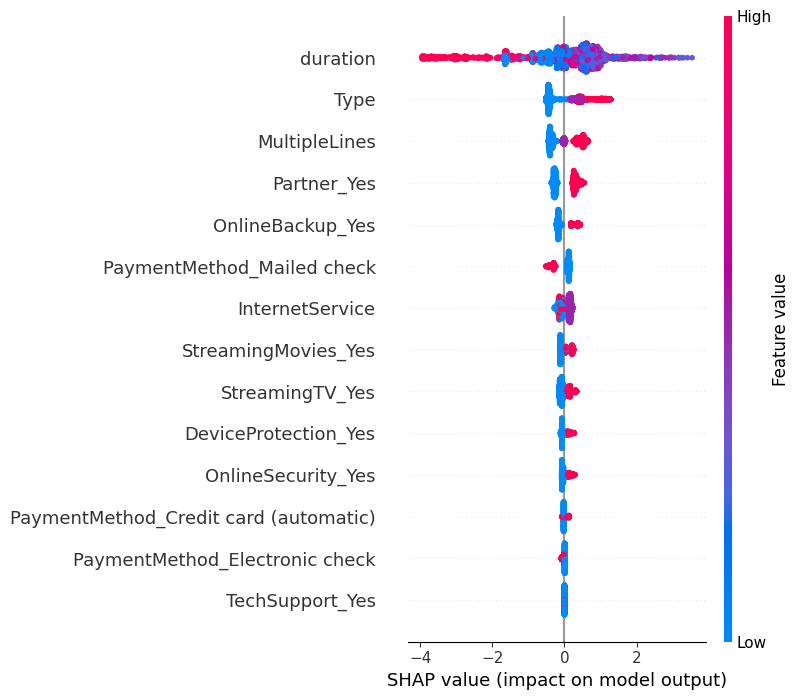

In [73]:
shap.summary_plot(shap_values, cod_features_test, max_display=cod_features_test.shape[1])

**Как мы видим самыми сильновлиящюми признаком оказался созданный признак - это колличества дней проведённым клиентом в компании, вторым идём вид оплаты, третим же подключение услуги мультилинии**